In [353]:
import pandas as pd
import numpy as np
import csv
import pathlib
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [354]:
df = pd.read_csv("./CSVs/2022_games/nba2021-2022.csv", na_values="   nan")

#df.dropna(inplace=True)

In [355]:

# Dropping unneeded columns
df.drop(["Unnamed: 6"], axis = 1, inplace = True)
df.drop(["Notes"], axis = 1, inplace= True) 
df.columns.values[6] = 'Overtimes' # renaming a column


In [356]:
# rename
df.columns.values[6] = 'Overtimes'
df.columns.values[2] = 'Visitor'
df.columns.values[4] = 'Home'



In [357]:
# changing OT column values to integers
df['Overtimes'].fillna(0, inplace=True)
df['Overtimes'].mask(df['Overtimes'] == "OT", 1, inplace=True)
df['Overtimes'].mask(df['Overtimes'] == "2OT", 2, inplace= True)
df['Overtimes'].mask(df['Overtimes'] == "3OT", 3, inplace=True)
df.columns.values[6] = 'Overtimes'
df.columns.values[2] = 'Visitor'
df.columns.values[4] = 'Home'



In [358]:
# establishing Winner of each game
df['Winner'] = np.where(df['PTS.1'] > df['PTS'], df['Home'], df['Visitor'])
# establish if home team won 
df['Home_team_win'] = np.where(df['PTS.1'] > df['PTS'], True, False)
# 
df["Home_team_win_margin"] = np.where(df['Home_team_win'] == True, df['PTS.1'] - df['PTS'], df['PTS.1'] - df['PTS'])

df["Winner_Margin"] = np.where(df["Winner"] == df["Home"], df["PTS.1"] - df["PTS"], df['PTS'] - df['PTS.1'])


In [359]:
# Formating the time
arr = df['Start (ET)'].T
for f, i in enumerate(arr): # f represents index and i represents element in the numpy array
    
    i = i.replace("p", "")
    i = i.split(":")
    i[0] = i[0].zfill(2)
    i[0] = int(i[0]) + 12
    i[0] = str(i[0])
    i = str(i[0]) + ":" + str(i[1])
    arr[f] = i
df['Start (ET)'] = arr
df

C:\Users\kyle\AppData\Local\Temp\ipykernel_20808\3561100264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[f] = i


,Date,Start (ET),Visitor,PTS,Home,PTS.1,Overtimes,Attend.,Arena,Winner,Home_team_win,Home_team_win_margin,Winner_Margin
0,Tue Oct 19 2021,19:30,Brooklyn Nets,104,Milwaukee Bucks,127,0,17341.0,Fiserv Forum,Milwaukee Bucks,True,23,23
1,Tue Oct 19 2021,22:00,Golden State Warriors,121,Los Angeles Lakers,114,0,18997.0,Crypto.com Arena,Golden State Warriors,False,-7,7
2,Wed Oct 20 2021,19:00,Indiana Pacers,122,Charlotte Hornets,123,0,15521.0,Spectrum Center,Charlotte Hornets,True,1,1
3,Wed Oct 20 2021,19:00,Chicago Bulls,94,Detroit Pistons,88,0,20088.0,Little Caesars Arena,Chicago Bulls,False,-6,6
4,Wed Oct 20 2021,19:30,Boston Celtics,134,New York Knicks,138,2,19812.0,Madison Square Garden (IV),New York Knicks,True,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Sun Jun 5 2022,20:00,Boston Celtics,88,Golden State Warriors,107,0,18064.0,Chase Center,Golden State Warriors,True,19,19
1319,Wed Jun 8 2022,21:00,Golden State Warriors,100,Boston Celtics,116,0,19156.0,TD Garden,Boston Celtics,True,16,16
1320,Fri Jun 10 2022,21:00,Golden State Warriors,107,Boston Celtics,97,0,19156.0,TD Garden,Golden State Warriors,False,-10,10
1321,Mon Jun 13 2022,21:00,Boston Celtics,94,Golden State Warriors,104,0,18064.0,Chase Center,Golden State Warriors,True,10,10


In [360]:
teams = df['Visitor'].unique()
times = df['Start (ET)'].unique()
times


array(['19:30', '22:00', '19:00', '20:00', '20:30', '21:00', '18:00',
       '22:30', '16:00', '21:30', '17:00', '15:30', '13:00', '24:00',
       '14:30', '15:00', '18:30', '24:30', '14:00', '19:45', '16:30'],
      dtype=object)

In [361]:
def teamdf(team):
    strteam = str(team)
    return df[(df['Visitor'] == strteam) | (df['Home'] == strteam)]


In [362]:
Nets = teamdf('Brooklyn Nets') #
GSW_df = teamdf('Golden State Warriors') #
Pacers = teamdf('Indiana Pacers') #

Bulls = teamdf('Chicago Bulls') 
Celtics = teamdf('Boston Celtics') 
Wizards = teamdf('Washington Wizards')#

Cavs = teamdf('Cleveland Cavaliers') 
Rockets = teamdf('Houston Rockets') 
Phil76ers = teamdf('Philadelphia 76ers')#

Magic = teamdf('Orlando Magic') #
Thunder = teamdf('Oklahoma City Thunder')#
Kings = teamdf("Sacramento Kings") #

Nuggets = teamdf('Denver Nuggets') #
Mavs = teamdf('Dallas Mavericks') #
Bucks = teamdf('Milwaukee Bucks') 

Clippers = teamdf('Los Angeles Clippers') 
Knicks = teamdf('New York Knicks') #
Hornets = teamdf('Charlotte Hornets') #

Raptors = teamdf('Toronto Raptors') #
Pelicans = teamdf('New Orleans Pelicans')#
Spurs = teamdf('San Antonio Spurs')#

Suns = teamdf('Phoenix Suns')#
Jazz = teamdf('Utah Jazz') #
Hawks = teamdf('Atlanta Hawks') #

Heat = teamdf('Miami Heat')
Pistons = teamdf('Detroit Pistons')
Griz = teamdf('Memphis Grizzlies') 

Blazers = teamdf('Portland Trail Blazers') 
Lakers = teamdf("Los Angeles Lakers") #
Timber = teamdf("Minnesota Timberwolves")#
df["Visitor"].unique()


array(['Brooklyn Nets', 'Golden State Warriors', 'Indiana Pacers',
       'Chicago Bulls', 'Boston Celtics', 'Washington Wizards',
       'Cleveland Cavaliers', 'Houston Rockets', 'Philadelphia 76ers',
       'Orlando Magic', 'Oklahoma City Thunder', 'Sacramento Kings',
       'Denver Nuggets', 'Dallas Mavericks', 'Milwaukee Bucks',
       'Los Angeles Clippers', 'New York Knicks', 'Charlotte Hornets',
       'Toronto Raptors', 'New Orleans Pelicans', 'San Antonio Spurs',
       'Phoenix Suns', 'Utah Jazz', 'Atlanta Hawks', 'Miami Heat',
       'Detroit Pistons', 'Memphis Grizzlies', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Minnesota Timberwolves'], dtype=object)

In [363]:
all_teams = {"Brooklyn Nets":Nets, 
             "Golden State Warriors" :GSW_df,
             "Indiana Pacers" : Pacers, 

             "Chicago Bulls" : Bulls,
             "Boston Celtics" : Celtics, 
             "Washington Wizards": Wizards,

             "Cleveland Cavaliers": Cavs,  
             "Houston Rockets":Rockets, 
             "Philadelphia 76ers" : Phil76ers, 

             "Orlando Magic" : Magic,
             "Oklahoma City Thunder" : Thunder,
             "Sacramento Kings" : Kings,

             "Denver Nuggets" : Nuggets,
             "Dallas Mavericks" : Mavs,
             "Milwaukee Bucks" : Bucks, 

             "Los Angeles Clippers" : Clippers, 
             "New York Knicks" : Knicks,
             "Charlotte Hornets" : Hornets,

             "Toronto Raptors" : Raptors, 
             "New Orleans Pelicans" : Pelicans, 
             "San Antonio Spurs" : Spurs, 

             "Phoenix Suns" : Suns,
             "Utah Jazz" : Jazz,
             "Atlanta Hawks" : Hawks, 

             "Miami Heat" : Heat,
             "Detroit Pistons" : Pistons,
             "Memphis Grizzlies" : Griz, 
             
             "Portland Trail Blazers" : Blazers, 
             "Los Angeles Lakers" : Lakers,
             "Minnesota Timberwolves" :  Timber}
print(len(all_teams))

30


In [364]:
test214 = Timber[Timber['Home'] == "Minnesota Timberwolves"] 
len(test214)

45

In [365]:
data = []
for team, teamdf in all_teams.items():
    homedf = teamdf[teamdf['Home'] == team] 
    awaydf = teamdf[teamdf['Home'] != team]
    winprop = len(teamdf[teamdf['Winner'] == team]) / len(teamdf)
    assert len(homedf) > 0, team
    home_win_prop =  len(homedf[homedf['Home_team_win'] == True]) / len(homedf)
    away_win_prop = len(awaydf[awaydf['Winner'] == team]) / len(awaydf)
    d = {'Team' : team, 'win_proportion' : winprop, 'home_win_prop' : home_win_prop,  "away_win_prop": away_win_prop}
    data.append(d)
winpropdf = pd.DataFrame(data)

In [366]:
winpropdf.corr()

,win_proportion,home_win_prop,away_win_prop
win_proportion,1.000000,0.944576,0.934692
home_win_prop,0.944576,1.000000,0.766250
away_win_prop,0.934692,0.766250,1.000000


In [367]:
for team, teamdf in all_teams.items():
    
    targetfolder = pathlib.Path('All_teams')

    targetfolder.mkdir(exist_ok=True)
    fname = pathlib.Path(team + ".csv")

    out = targetfolder / fname
    teamdf.to_csv(out)

In [368]:
stat2019 = pd.read_csv("./CSVs/Team Stats/2019-avgs.csv", na_values = 'TOT')
stat2020 = pd.read_csv("./CSVs/Team Stats/2020-avgs.csv", na_values = 'TOT')
stat2021 = pd.read_csv("./CSVs/Team Stats/2021-avgs.csv", na_values= 'TOT')
stat2022 = pd.read_csv("./CSVs/Team Stats/2022-avgs.csv", na_values = 'TOT')
stat2019.dropna(inplace=True)
stat2020.dropna(inplace=True)

stat2021.dropna(inplace=True)
stat2022.dropna(inplace=True)

print(len(stat2019))
print(len(stat2020))
print(len(stat2021))
print(len(stat2022))


30
30
30
30


In [369]:
allstatyearavg = pd.concat([stat2019, stat2020, stat2021, stat2022])

In [370]:

allstatyearavg.to_csv("allstatavg.csv")

In [371]:
allstatyearavg

,Tm,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,154.181818,342.000000,0.458364,48.500000,137.909091,0.346905,105.681818,204.090909,0.478095,...,0.717316,43.409091,128.409091,171.818182,96.272727,30.681818,19.045455,61.954545,87.818182,422.454545
1,BOS,203.000000,436.647059,0.481353,60.705882,166.411765,0.355400,142.294118,270.235294,0.547059,...,0.738875,47.294118,167.588235,214.882353,126.764706,41.529412,25.588235,59.941176,98.235294,542.117647
2,BRK,173.736842,387.263158,0.468895,55.105263,156.052632,0.230737,118.631579,231.210526,0.551316,...,0.652632,47.368421,153.631579,201.000000,102.842105,28.368421,17.842105,62.157895,92.789474,484.421053
3,CHI,148.454545,327.500000,0.449476,33.863636,96.500000,0.317667,114.590909,231.000000,0.490190,...,0.764381,32.636364,127.227273,159.863636,81.636364,27.409091,15.954545,50.272727,75.590909,391.136364
4,CHO,193.941176,433.058824,0.427294,57.470588,163.705882,0.296333,136.470588,269.352941,0.485000,...,0.761133,47.882353,163.411765,211.294118,112.058824,34.764706,23.823529,56.235294,91.176471,534.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,SAC,127.730769,277.807692,0.411360,36.038462,104.692308,0.331087,91.692308,173.115385,0.459360,...,0.751292,30.153846,105.269231,135.423077,74.730769,22.615385,14.192308,42.692308,59.692308,347.884615
26,SAS,147.750000,316.708333,0.423435,38.541667,109.416667,0.284545,109.208333,207.291667,0.499636,...,0.716318,37.541667,117.291667,154.833333,95.375000,26.083333,16.791667,42.041667,61.791667,386.625000
27,TOR,144.869565,325.608696,0.418773,42.565217,122.086957,0.270364,102.304348,203.521739,0.520143,...,0.751053,47.608696,114.000000,161.608696,78.652174,32.086957,16.347826,41.521739,69.869565,390.000000
29,UTA,138.625000,294.458333,0.451208,49.666667,137.833333,0.303000,88.958333,156.625000,0.568333,...,0.708316,36.833333,121.500000,158.333333,76.500000,24.500000,16.750000,44.958333,64.458333,388.166667


In [372]:
allstatyearavg.corr()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
FG,1.000000,0.984266,0.306311,0.748650,0.733144,0.162992,0.949656,0.912487,0.134210,0.259420,...,-0.117419,0.832104,0.961281,0.965304,0.940842,0.822943,0.822442,0.838953,0.893628,0.991211
FGA,0.984266,1.000000,0.246304,0.757822,0.765034,0.119003,0.924813,0.914394,0.106596,0.200462,...,-0.126318,0.878348,0.957242,0.974112,0.913217,0.838475,0.821094,0.857519,0.919062,0.982633
FG%,0.306311,0.246304,1.000000,0.302823,0.243854,0.360123,0.256155,0.190378,0.684686,0.939599,...,-0.083957,0.080740,0.256151,0.220759,0.348444,0.191908,0.253708,0.274041,0.230973,0.302452
3P,0.748650,0.757822,0.302823,1.000000,0.977154,0.128097,0.503255,0.443137,0.278634,0.390824,...,-0.006302,0.635088,0.762288,0.759074,0.706525,0.630772,0.628572,0.677273,0.708942,0.807525
3PA,0.733144,0.765034,0.243854,0.977154,1.000000,0.058479,0.493840,0.438839,0.297382,0.329822,...,-0.047118,0.670193,0.754466,0.762049,0.696872,0.657639,0.635704,0.711861,0.726672,0.792839
3P%,0.162992,0.119003,0.360123,0.128097,0.058479,1.000000,0.151917,0.129285,-0.099378,0.490920,...,0.244214,-0.022150,0.176889,0.132300,0.174744,0.065898,0.108437,0.088704,0.061632,0.159659
2P,0.949656,0.924813,0.256155,0.503255,0.493840,0.151917,1.000000,0.979963,0.043262,0.153449,...,-0.150071,0.784479,0.892743,0.899506,0.892453,0.774577,0.774963,0.773471,0.829771,0.910378
2PA,0.912487,0.914394,0.190378,0.443137,0.438839,0.129285,0.979963,1.000000,-0.038207,0.072374,...,-0.146633,0.804271,0.861376,0.880149,0.836152,0.756526,0.746064,0.749015,0.825576,0.872683
2P%,0.134210,0.106596,0.684686,0.278634,0.297382,-0.099378,0.043262,-0.038207,1.000000,0.639558,...,-0.251654,0.053041,0.096468,0.088993,0.165523,0.177772,0.139883,0.150857,0.101371,0.146933
eFG%,0.259420,0.200462,0.939599,0.390824,0.329822,0.490920,0.153449,0.072374,0.639558,1.000000,...,-0.038462,0.046920,0.240972,0.200169,0.311370,0.164480,0.200793,0.260395,0.195298,0.276427


In [373]:
#df['Attend.']

df2 = df[df['Winner_Margin'] <= 20]
df2 = df2[df2['Attend.'] > 1]

In [374]:
attend_margin_corr2 = df2.corr().iloc[4,2]

winner_margin_attend_corr2 = df2.corr().iloc[5,2]
print(attend_margin_corr2, winner_margin_attend_corr2)

0.11674333733809643 -0.03714230376388113


In [375]:
attend_margin_corr = df.corr().iloc[4,2]

winner_margin_attend_corr = df.corr().iloc[5,2]
#attend_margin_corr, winner_margin_attend_corr
df.corr()

,PTS,PTS.1,Attend.,Home_team_win,Home_team_win_margin,Winner_Margin
PTS,1.000000,0.258358,-0.060795,-0.502672,-0.621112,-0.077124
PTS.1,0.258358,1.000000,-0.020919,0.473414,0.596645,0.126594
Attend.,-0.060795,-0.020919,1.000000,0.063598,0.033539,0.010707
Home_team_win,-0.502672,0.473414,0.063598,1.000000,0.801639,0.076183
Home_team_win_margin,-0.621112,0.596645,0.033539,0.801639,1.000000,0.166769
Winner_Margin,-0.077124,0.126594,0.010707,0.076183,0.166769,1.000000


In [376]:
slope = (df['Home_team_win_margin'].std() / df['Attend.'].std()) * 0.033539	
slope

0.00018604859339082884

In [377]:
intercept = df['Home_team_win_margin'].mean() - (slope * df['Attend.'].mean())
intercept

-1.3077528545713029

<AxesSubplot: xlabel='Attend.', ylabel='Home_team_win_margin'>

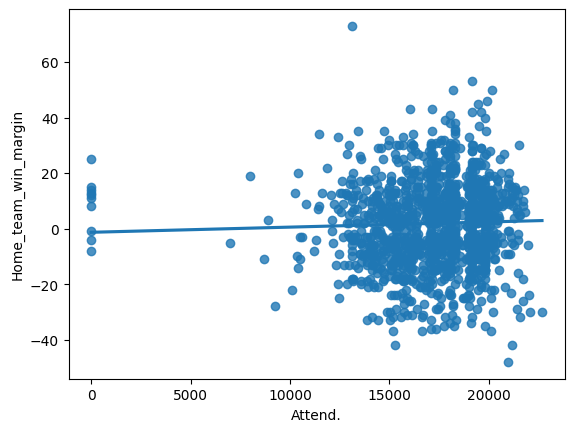

In [378]:
sns.regplot(data=df, x="Attend.", y="Home_team_win_margin", ci=None)


<AxesSubplot: xlabel='Attend.', ylabel='Winner_Margin'>

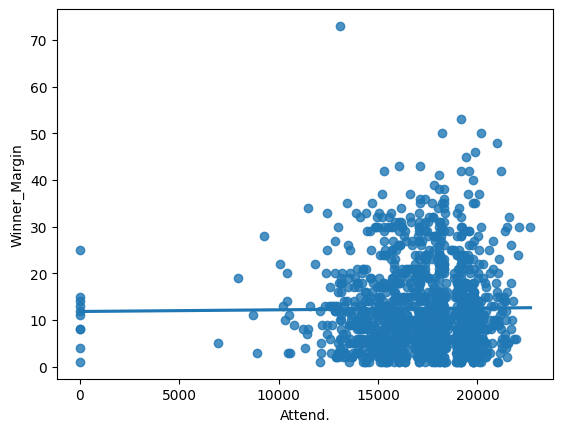

In [379]:
sns.regplot(data=df, x="Attend.", y="Winner_Margin", ci=None)

In [380]:

df.rename(columns = {"Attend.": "Attend"}, 
         inplace = True)
df2.rename(columns = {"Attend.": "Attend"}, 
          inplace = True)
results = smf.ols('Attend ~ Winner_Margin', data=df).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attend   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1509
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.698
Time:                        18:34:03   Log-Likelihood:                -12313.
No. Observations:                1318   AIC:                         2.463e+04
Df Residuals:                    1316   BIC:                         2.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.713e+04    127.928    133.901      0.000    1.69e+04    1.74e+04
Winner_Margin     3.2158      8.279      0.388      0.698     -13.026      19.457
==============================================================================
Omnibus:                      654.931   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6380.001
Skew:                          -2.084   Prob(JB):                         0.00
Kurtosis:                      12.940   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
results2 = smf.ols('Attend ~ Home_team_win_margin', data=df).fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.482
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.224
Time:                        18:34:03   Log-Likelihood:                -12312.
No. Observations:                1318   AIC:                         2.463e+04
Df Residuals:                    1316   BIC:                         2.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.716e+04     76.626    223.921      0.000     1.7e+04    1.73e+04
Home_team_win_margin     6.0369      4.959      1.217      0.224      -3.692      15.765
==============================================================================
Omnibus:                      659.962   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6551.153
Skew:                          -2.098   Prob(JB):                         0.00
Kurtosis:                      13.084   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='Attend', ylabel='Home_team_win_margin'>

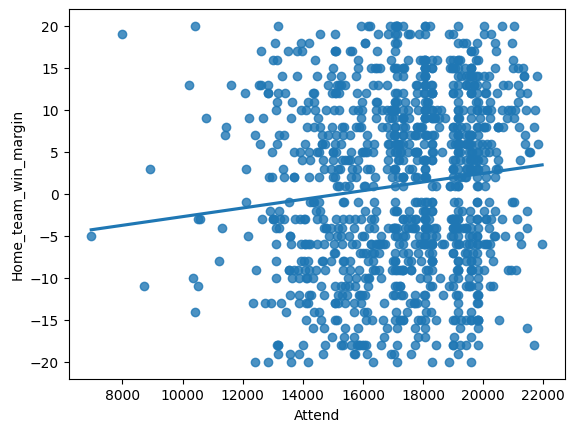

In [382]:
sns.regplot(data=df2, x="Attend", y="Home_team_win_margin", ci=None)

In [383]:
results3 = smf.ols('Attend ~ Home_team_win_margin', data=df2).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attend   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     14.92
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           0.000119
Time:                        18:34:04   Log-Likelihood:                -9929.6
No. Observations:                1082   AIC:                         1.986e+04
Df Residuals:                    1080   BIC:                         1.987e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.725e+04     71.578    240.944      0.000    1.71e+04    1.74e+04
Home_team_win_margin    26.4544      6.848      3.863      0.000      13.017      39.892
==============================================================================
Omnibus:                       65.097   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.448
Skew:                          -0.630   Prob(JB):                     4.14e-17
Kurtosis:                       3.294   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='Attend', ylabel='Winner_Margin'>

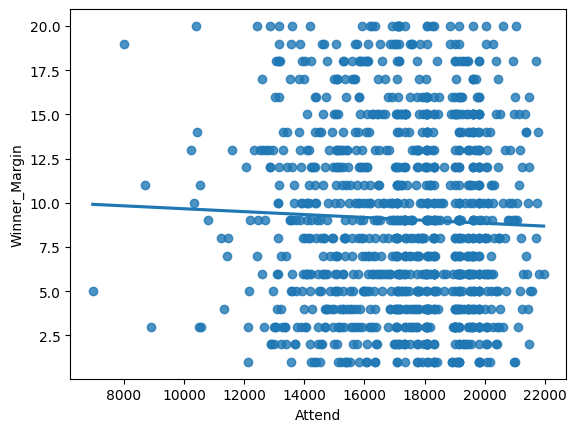

In [384]:
sns.regplot(data=df2, x="Attend", y="Winner_Margin", ci=None)

In [385]:
results4 = smf.ols('Attend ~ Home_team_win_margin', data=df2).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attend   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     14.92
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           0.000119
Time:                        18:34:05   Log-Likelihood:                -9929.6
No. Observations:                1082   AIC:                         1.986e+04
Df Residuals:                    1080   BIC:                         1.987e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.725e+04     71.578    240.944      0.000    1.71e+04    1.74e+04
Home_team_win_margin    26.4544      6.848      3.863      0.000      13.017      39.892
==============================================================================
Omnibus:                       65.097   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.448
Skew:                          -0.630   Prob(JB):                     4.14e-17
Kurtosis:                       3.294   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
df["Margin_predicted"] = intercept + (slope * df['Attend'])

In [387]:
df['residuals'] = df['Home_team_win_margin'] - df["Margin_predicted"]

In [388]:
avg_error = ((1 - (attend_margin_corr ** 2)) ** .5) * df['Home_team_win_margin'].std() 
avg_error

15.311046290889509

In [389]:
print(avg_error, attend_margin_corr)
df.dropna(inplace=True)

15.311046290889509 0.03353853094999323


In [390]:
regress = LinearRegression()


In [391]:
regress.fit(df[['Attend']], df['Home_team_win_margin'])

LinearRegression()

In [392]:
df["Predict2"] = regress.predict(df[["Attend"]])

In [393]:
df['Predict2'].std()
df['Predict2'].mean()

1.8808801213960553

In [394]:
df['error'] = df['Home_team_win_margin'] - df['Predict2']

df['error']

0       21.087178
1       -9.221381
2       -0.573706
3       -8.424665
4        1.626762
          ...    
1318    16.952463
1319    13.748993
1320   -12.251007
1321     7.952463
1322   -15.251007
Name: error, Length: 1318, dtype: float64

In [395]:
sum(abs(df['error']) / len(df))

12.24446862772168

In [396]:
model2 = LinearRegression()

In [397]:
model2.fit(df[['Attend']], df['Winner_Margin'])

LinearRegression()

In [398]:
df['Prediction5'] = model2.predict(df[['Attend']])
df['error2'] = df['Winner_Margin'] - df['Prediction5']

In [399]:
sum(abs(df['error2']) / len(df))

7.156593413746063

In [400]:
df['error2'].std()

9.194206431423893